I choose Random Forest because it gives the best results and works well for accurate salary prediction.

In [35]:
#importing libraries
import pandas as pd
#load the dataset
df = pd.read_csv('C:/Users/GUNKESHRI/Desktop/Aicte aiml/Employee_Salary_Prediction/Employee_Dataset.csv.csv')
df.head(5)

,Age,Education_Level,Years_Experience,Job_Title,Location,Industry,Workclass,Gender,Hours_per_week,Marital_Status,Salary_USD
0,60,Master's,0,Business Analyst,San Diego,Retail,Self-employed,Male,53,Divorced,79510
1,50,High School,11,Software Engineer,Kolkata,Retail,Self-employed,Male,38,Single,48706
2,36,Master's,6,HR Manager,Seattle,Consulting,Private,Female,35,Married,77008
3,29,High School,7,ML Engineer,New York,Healthcare,Private,Female,58,Divorced,172733
4,42,Bachelor's,8,Data Engineer,Denver,Tech,Government,Male,52,Married,134266


In [36]:
df.shape

(8000, 11)

In [37]:
df.tail(3)

,Age,Education_Level,Years_Experience,Job_Title,Location,Industry,Workclass,Gender,Hours_per_week,Marital_Status,Salary_USD
7997,49,PhD,10,Data Analyst,Delhi,Consulting,Self-employed,Female,53,Married,34620
7998,29,Bachelor's,13,Business Analyst,Delhi,Retail,Government,Female,42,Divorced,41231
7999,45,PhD,17,Data Scientist,Delhi,Finance,Government,Female,30,Married,59819


In [38]:
df.isna()

,Age,Education_Level,Years_Experience,Job_Title,Location,Industry,Workclass,Gender,Hours_per_week,Marital_Status,Salary_USD
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
7995,False,False,False,False,False,False,False,False,False,False,False
7996,False,False,False,False,False,False,False,False,False,False,False
7997,False,False,False,False,False,False,False,False,False,False,False
7998,False,False,False,False,False,False,False,False,False,False,False


In [39]:
df.isna().sum()

Age                 0
Education_Level     0
Years_Experience    0
Job_Title           0
Location            0
Industry            0
Workclass           0
Gender              0
Hours_per_week      0
Marital_Status      0
Salary_USD          0
dtype: int64

In [40]:
print(df.Gender.value_counts())

Gender
Male      4078
Female    3922
Name: count, dtype: int64


In [41]:
print(df['Marital_Status'].value_counts())

Marital_Status
Married     2682
Single      2668
Divorced    2650
Name: count, dtype: int64


In [42]:
print(df['Workclass'].value_counts())

Workclass
Government       2747
Self-employed    2651
Private          2602
Name: count, dtype: int64


In [43]:
print(df.Education_Level.value_counts())

Education_Level
High School    2049
PhD            2025
Bachelor's     1970
Master's       1956
Name: count, dtype: int64


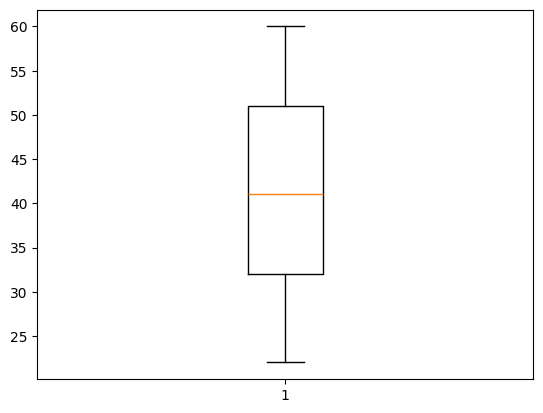

In [44]:
import matplotlib.pyplot as plt  #outliers
plt.boxplot(df['Age'])
plt.show()

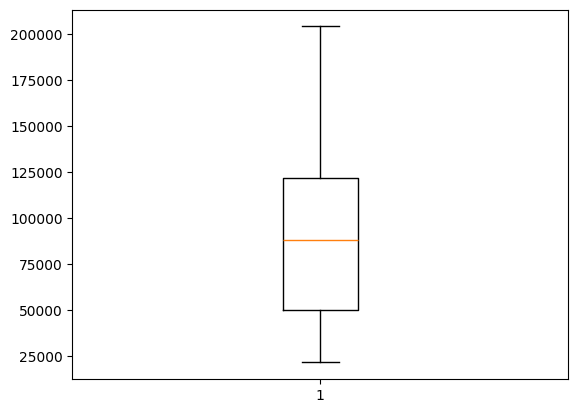

In [45]:
import matplotlib.pyplot as plt  #outliers
plt.boxplot(df['Salary_USD'])
plt.show()

In [46]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               8000 non-null   int64 
 1   Education_Level   8000 non-null   object
 2   Years_Experience  8000 non-null   int64 
 3   Job_Title         8000 non-null   object
 4   Location          8000 non-null   object
 5   Industry          8000 non-null   object
 6   Workclass         8000 non-null   object
 7   Gender            8000 non-null   object
 8   Hours_per_week    8000 non-null   int64 
 9   Marital_Status    8000 non-null   object
 10  Salary_USD        8000 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 687.6+ KB
None


In [47]:
df.describe()

,Age,Years_Experience,Hours_per_week,Salary_USD
count,8000.000000,8000.000000,8000.000000,8000.000000
mean,41.174875,9.587625,44.438625,88330.178750
std,11.191323,5.784376,8.695412,40901.130429
min,22.000000,0.000000,30.000000,21303.000000
25%,32.000000,5.000000,37.000000,50112.250000
50%,41.000000,10.000000,44.000000,87721.500000
75%,51.000000,15.000000,52.000000,121678.500000
max,60.000000,19.000000,59.000000,204253.000000


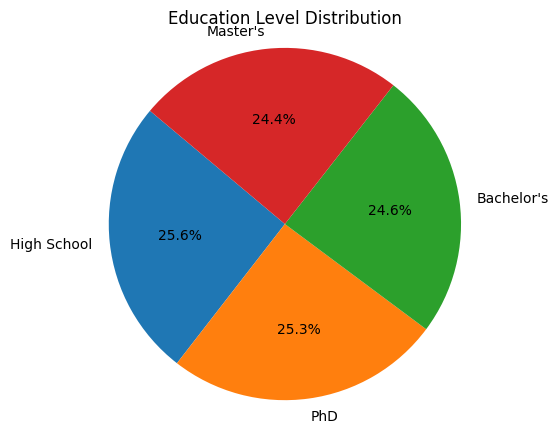

In [48]:
#Pie chart for Education Level
edu_counts=df['Education_Level'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(edu_counts,labels=edu_counts.index,autopct='%1.1f%%',startangle=140)
plt.title("Education Level Distribution")
plt.axis('equal')  
plt.show()

C:\Users\GUNKESHRI\AppData\Local\Temp\ipykernel_22352\2513950942.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values,y=top_locations.index,palette='coolwarm')


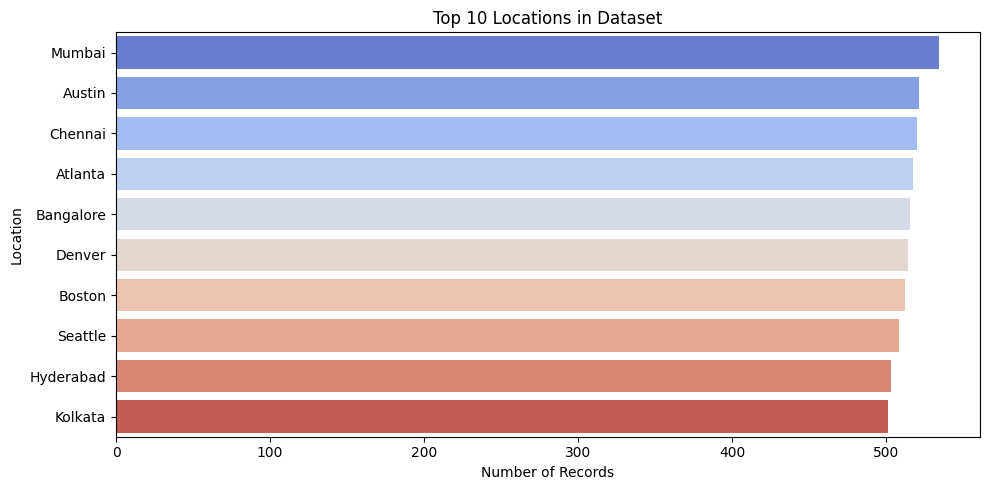

In [49]:
# Bar chart for top 10 Locations
import seaborn as sns
top_locations=df['Location'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_locations.values,y=top_locations.index,palette='coolwarm')
plt.title("Top 10 Locations in Dataset")
plt.xlabel("Number of Records")
plt.ylabel("Location")
plt.tight_layout()
plt.show()

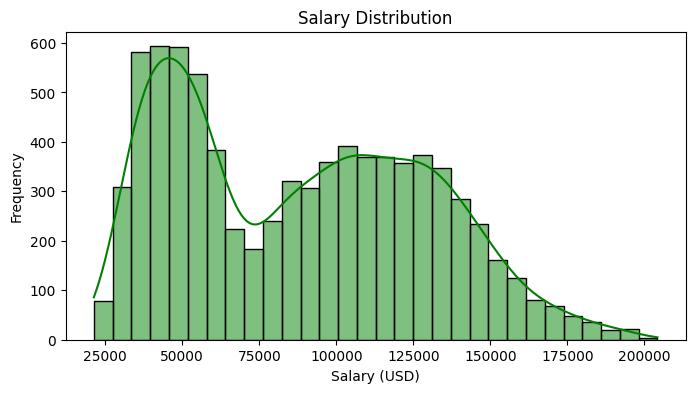

In [50]:
plt.figure(figsize=(8,4))
sns.histplot(df['Salary_USD'],bins=30,kde=True,color='green')
plt.title("Salary Distribution")
plt.xlabel("Salary (USD)")
plt.ylabel("Frequency")
plt.show()

C:\Users\GUNKESHRI\AppData\Local\Temp\ipykernel_22352\3568595341.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Job_Title'].isin(top_jobs)],x='Job_Title',order=top_jobs,palette='magma')


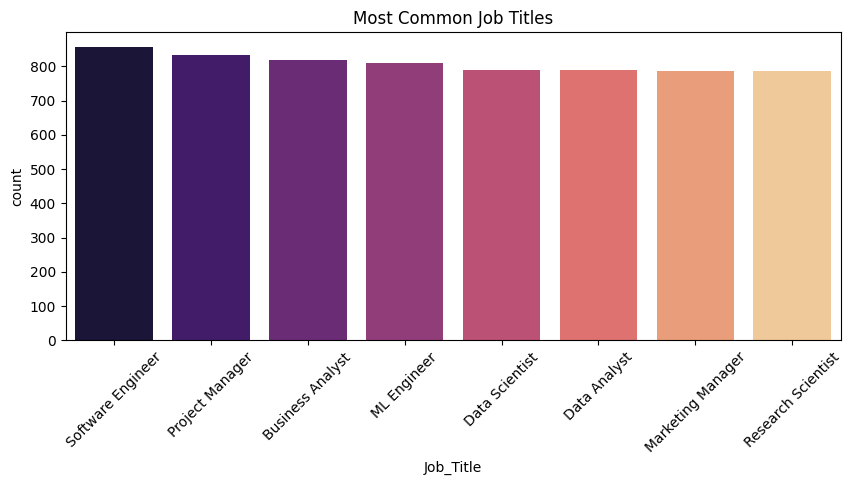

In [51]:
top_jobs=df['Job_Title'].value_counts().head(8).index
plt.figure(figsize=(10,4))
sns.countplot(data=df[df['Job_Title'].isin(top_jobs)],x='Job_Title',order=top_jobs,palette='magma')
plt.title("Most Common Job Titles")
plt.xticks(rotation=45)
plt.show()

In [52]:
print(df.columns.tolist())


['Age', 'Education_Level', 'Years_Experience', 'Job_Title', 'Location', 'Industry', 'Workclass', 'Gender', 'Hours_per_week', 'Marital_Status', 'Salary_USD']


In [53]:
df.columns = df.columns.str.strip()  #Removes spaces from column names


In [54]:
#importing the libraries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

In [55]:
#Keep only required features
df=df[['Age','Years_Experience','Education_Level','Job_Title','Location','Salary_USD']]

In [56]:
#Feature matrix and target
X=df.drop('Salary_USD', axis=1)
y=df['Salary_USD']

In [57]:
#Preprocessing setup
numeric_features=['Age','Years_Experience']
categorical_features = ['Education_Level','Job_Title','Location']
preprocessor = ColumnTransformer([
    ('num',StandardScaler(), numeric_features),
    ('cat',OneHotEncoder(handle_unknown='ignore'), categorical_features)
])


In [58]:
#Pipeline with RandomForest
model=Pipeline([
    ('preprocessor',preprocessor),
    ('regressor',RandomForestRegressor(n_estimators=100, random_state=42))
])

In [59]:
#Split, train, and evaluate
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)


In [60]:
#Evaluation Metrics
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
custom_accuracy=np.mean(np.abs(y_pred-y_test)<=10000)*100

print(f"R² Score:{r2:.4f}")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"Custom Accuracy: {custom_accuracy:.2f}%")

R² Score:0.9868
Mean Absolute Error (MAE): $3,538.28
Root Mean Squared Error (RMSE): $4,696.25
Custom Accuracy: 95.56%


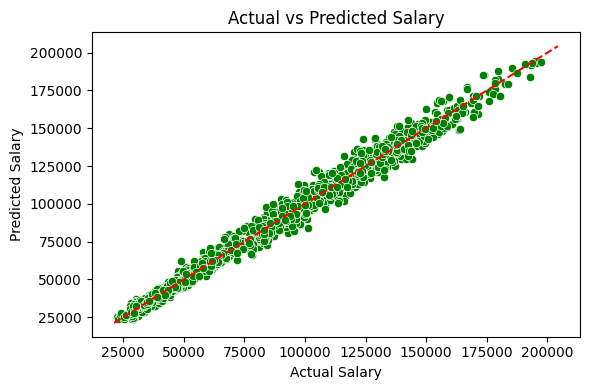

In [64]:
#Actual vs Predicted
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test,y=y_pred,color='green')
plt.plot([y.min(),y.max()],[y.min(),y.max()],'r--')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.tight_layout()
plt.show()

In [62]:
#Save model
import joblib
joblib.dump(model,'salary_model.pkl')
print("Model saved as 'salary_model.pkl'")

Model saved as 'salary_model.pkl'
